In [ ]:

# #importing the required libraries
# import cv2
# import numpy as np

# #loading the image to detect
# image_to_detect = cv2.imread('images/testing/trump-modi.jpg')
# img_height = image_to_detect.shape[0]
# img_width = image_to_detect.shape[1]

# # downloading the caffe model definition and weights
# # https://github.com/opencv/opencv/blob/master/samples/dnn/face_detector/deploy.prototxt
# # https://github.com/opencv/opencv_3rdparty/blob/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

# #load the pretrained ssd classifier model
# face_detection_classifier = cv2.dnn.readNetFromCaffe('models/deploy.prototxt.txt','models/res10_300x300_ssd_iter_140000.caffemodel')

# # resize the image to 300x300
# resized_image = cv2.resize(image_to_detect,(300,300))
# # create blob of the image
# image_to_detect_blob = cv2.dnn.blobFromImage(resized_image,1.0,(300,300),(104, 177, 123))
# # https://github.com/opencv/opencv/tree/master/samples/dnn mean subtraction values for RGB

# # pass the blob as model input
# face_detection_classifier.setInput(image_to_detect_blob)

# #detect all face locations using the haar classifier
# all_face_locations = face_detection_classifier.forward()
# # 4-D array returned, 
# # eg: all_face_locations[0, 0, index, 1] , 1 => will have the prediction class index
# # 2 => will have confidence, 
# # 3 to 7 => will have the bounding box co-ordinates


# #print the number of faces detected
# print('There are {} no of faces in this image'.format(len(all_face_locations)))

# #number of faces detected
# no_of_detections = all_face_locations.shape[2]

# #looping through the face locations
# for index in range(no_of_detections):
#     detection_confidence = all_face_locations[0, 0, index, 2]
    
#     if detection_confidence > 0.5:       
#         current_face_location = all_face_locations[0, 0, index, 3:7] * np.array([img_height, img_width, img_width, img_height]) 
#         #splitting the tuple to get the four position values of current face
#         left_x,left_y,right_x,right_y = current_face_location.astype("int")
#         #printing the location of current face
#         print('Found face {} at left_x:{},left_y:{},right_x:{},right_y:{}'.format(index+1,left_x,left_y,right_x,right_y))
#         #slicing the current face from main image
#         current_face_image = image_to_detect[left_y:right_y,left_x:right_x]
#         #showing the current face with dynamic title
#         cv2.imshow("Face no "+str(index+1),current_face_image)
#         #draw bounding box around the faces
#         cv2.rectangle(image_to_detect,(left_x,left_y),(right_x,right_y),(0,255,0),2)

# #show the image
# cv2.imshow("faces in image",image_to_detect)
# #keep the window waiting until we press a key
# cv2.waitKey(0)
# #close all windows
# cv2.destroyAllWindows()



There are 1 no of faces in this image
Found face 1 at left_x:175,left_y:31,right_x:270,right_y:141
Found face 2 at left_x:405,left_y:92,right_x:503,right_y:211


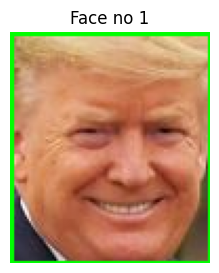

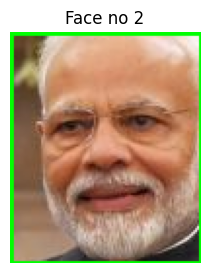

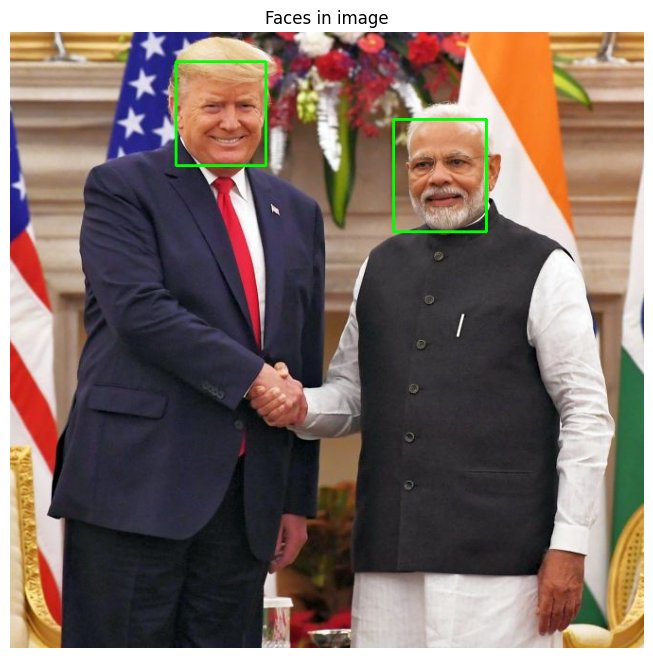

In [2]:
#importing the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#loading the image to detect
image_to_detect = cv2.imread('images/testing/trump-modi.jpg')
img_height = image_to_detect.shape[0]
img_width = image_to_detect.shape[1]
# downloading the caffe model definition and weights
# https://github.com/opencv/opencv/blob/master/samples/dnn/face_detector/deploy.prototxt
# https://github.com/opencv/opencv_3rdparty/blob/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
#load the pretrained ssd classifier model
face_detection_classifier = cv2.dnn.readNetFromCaffe('models/deploy.prototxt.txt','models/res10_300x300_ssd_iter_140000.caffemodel')
# resize the image to 300x300
resized_image = cv2.resize(image_to_detect,(300,300))
# create blob of the image
image_to_detect_blob = cv2.dnn.blobFromImage(resized_image,1.0,(300,300),(104, 177, 123))
# https://github.com/opencv/opencv/tree/master/samples/dnn mean subtraction values for RGB
# pass the blob as model input
face_detection_classifier.setInput(image_to_detect_blob)
#detect all face locations using the haar classifier
all_face_locations = face_detection_classifier.forward()
# 4-D array returned, 
# eg: all_face_locations[0, 0, index, 1] , 1 => will have the prediction class index
# 2 => will have confidence, 
# 3 to 7 => will have the bounding box co-ordinates
#print the number of faces detected
print('There are {} no of faces in this image'.format(len(all_face_locations)))
#number of faces detected
no_of_detections = all_face_locations.shape[2]

#list to store individual faces
face_images = []

#looping through the face locations
for index in range(no_of_detections):
    detection_confidence = all_face_locations[0, 0, index, 2]
    
    if detection_confidence > 0.5:       
        current_face_location = all_face_locations[0, 0, index, 3:7] * np.array([img_height, img_width, img_width, img_height]) 
        #splitting the tuple to get the four position values of current face
        left_x,left_y,right_x,right_y = current_face_location.astype("int")
        #printing the location of current face
        print('Found face {} at left_x:{},left_y:{},right_x:{},right_y:{}'.format(index+1,left_x,left_y,right_x,right_y))
        #slicing the current face from main image
        current_face_image = image_to_detect[left_y:right_y,left_x:right_x]
        #store face for display later
        face_images.append((index, current_face_image))
        #draw bounding box around the faces
        cv2.rectangle(image_to_detect,(left_x,left_y),(right_x,right_y),(0,255,0),2)

#show individual faces
for index, face_img in face_images:
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    plt.title("Face no " + str(index+1))
    plt.axis('off')
    plt.show()

#show the main image with all faces
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image_to_detect, cv2.COLOR_BGR2RGB))
plt.title("Faces in image")
plt.axis('off')
plt.show()